# Session 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,5]
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

We shall use the `bigmartsales` dataset. The data description is as follows:

**Item_Identifier:** Unique product ID assigned to every distinct item

**Item_Weight:** Weight of the product

**Item_Fat_Content:** Describes whether the product is low in fat or not

**Item_Visibility:** Total display area allocated to the particular product (in %)

**Item_Type:** Describes the food category to which the item belongs

**Item_MRP:** Maximum Retail Price (list price) of the product

**Outlet_Identifier:** Unique store ID assigned. It consists of an alphanumeric string of length 6

**Outlet_Establishment_Year:** The establishment year of the store

**Outlet_Size:** Size of the store in terms of ground area covered

**Outlet_Location_Type:** Size of the city in which the store is located

**Outlet_Type:** Is the outlet just a grocery store or a supermarket

**Profit:** Profit of the item sold (in %)

**Item_Outlet_Sales**: Sales of the product (target variable)

In [2]:
df_sales = pd.read_csv("bigmartsales-cleaned.csv")
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


## 1. Data Summary

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
df_sales['Outlet_Establishment_Year']=df_sales['Outlet_Establishment_Year'].astype(object)

In [5]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


In [6]:
num_data = df_sales.select_dtypes(include=np.number)

In [7]:
cors=num_data.corr()

<Axes: >

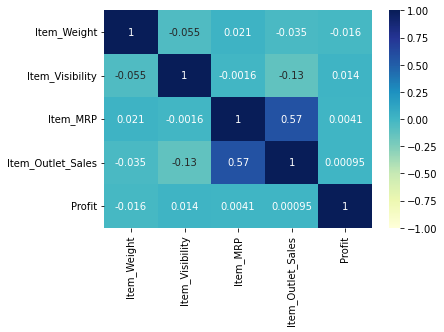

In [8]:
sb.heatmap(cors,annot=True,cmap='YlGnBu',vmax=1,vmin=-1)

In [9]:
df_sales.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,9,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,1463,2793,2793,5577


## 2. Missing values

In [10]:
missing_values = df_sales.isnull().sum().sort_values(ascending=False)
missing_values

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

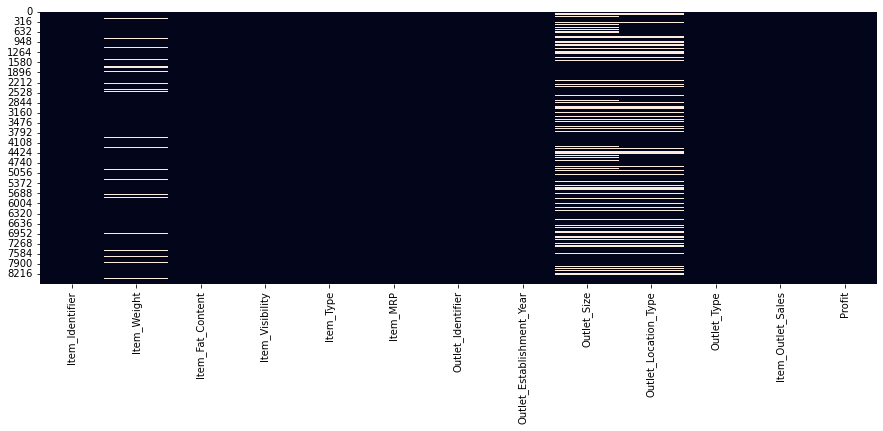

In [11]:
plt.rcParams["figure.figsize"]=[15,5]
sb.heatmap(df_sales.isnull(), cbar = False)
plt.show()

In [12]:
total = df_sales.isnull().sum().sort_values(ascending=False)
percent = ((df_sales.isnull().sum()/df_sales.shape[0])*100)
percent = percent.sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


In [13]:
# drop the rows having missing values
df_sales_drop = df_sales.dropna()
df_sales_drop.shape

(5364, 13)

In [14]:
df_sales.shape

(8523, 13)

In [15]:
8523-5364 # 37%

3159

### 1. The variable `Outlet_Size`

In [16]:
df_sales.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [17]:
df_sales.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df_sales.Outlet_Size.replace(np.NaN,"Medium" ,inplace = True)

In [19]:
df_sales.Outlet_Size.isnull().sum()

0

### 2. The variable `Outlet_Location_Type`:

In [20]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

In [21]:
df_sales.Outlet_Location_Type.replace(to_replace = "?", value = np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace = "  --", value = np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace = "  -", value = np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace = "na", value = np.NaN, inplace = True)
df_sales.Outlet_Location_Type.replace(to_replace = "NAN", value = np.NaN, inplace = True)

In [22]:
df_sales.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
Name: count, dtype: int64

In [23]:
df_sales.Outlet_Location_Type.isnull().sum()

2410

In [24]:
df_impute = df_sales[["Item_Outlet_Sales","Outlet_Location_Type"]].dropna()
df_impute = df_impute.groupby(df_impute["Outlet_Location_Type"]).mean()
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [25]:
df_sales.Outlet_Location_Type.isnull().sum()

2410

In [26]:
index = np.where(df_sales.Outlet_Location_Type.isnull())[0]

for ind in index:                                               
    if df_sales.loc[ind,"Item_Outlet_Sales"] <= 2100:           
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier1"      
    elif df_sales.loc[ind,"Item_Outlet_Sales"] >= 2500:         
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 2"     
    else:                                                       
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 3"    

In [27]:
df_sales.Outlet_Location_Type.isnull().sum()

0

In [28]:
df_sales["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier1     3947
Tier 2    3483
Tier 3    1093
Name: count, dtype: int64

### 3. The variable `Item_Weight`:

In [29]:
df_sales["Item_Weight"].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [30]:
df_sales["Item_Weight"].loc[df_sales["Item_Weight"]==0].count()

714

In [31]:
df_sales.Item_Weight.replace(0,np.NaN, inplace = True)

In [32]:
df_sales["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [33]:
df_sales["Item_Weight"].skew()

0.0824262091221237

In [34]:
me = df_sales["Item_Weight"].median()

In [35]:
df_sales["Item_Weight"].fillna(me, inplace = True)

In [36]:
df_sales['Item_Weight'].isnull().sum()

0

### 4. The variable `Item_Visibility`:

In [37]:
df_sales["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [38]:
num_zeros = (df_sales["Item_Visibility"] == 0).sum()
num_zeros

526

In [39]:
mu = df_sales["Item_Visibility"].mean()
df_sales.Item_Visibility.replace(0, mu, inplace = True)

In [40]:
df_sales["Item_Visibility"].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [41]:
missing_values = df_sales.isnull().sum().sort_values(ascending=False)
missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

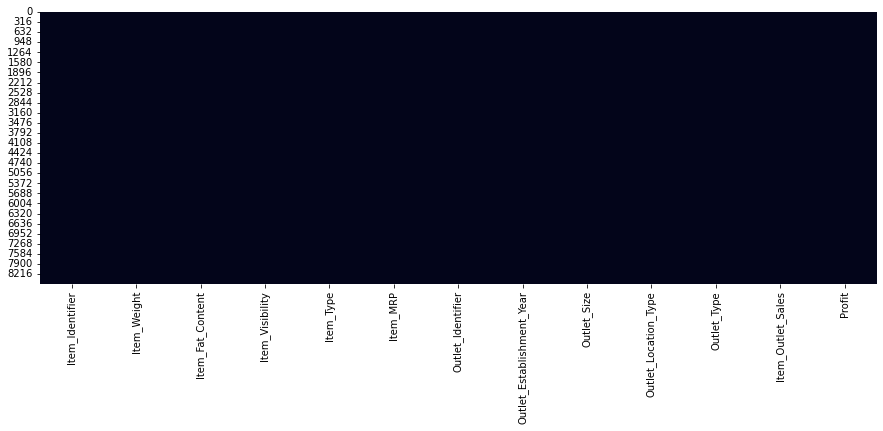

In [42]:
sb.heatmap(df_sales.isnull(), cbar = False)
plt.show()

## 3. Handle Non-Numeric Data

### 1.1 One-Hot Encoding (Using Pandas)

In [43]:
df_sales.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,9,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier1,Supermarket Type1
freq,10,5517,1232,935,1463,5203,3947,5577


In [44]:
print('Categories in Item_Type:', df_sales.Item_Type.unique())

Categories in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [45]:
test=pd.get_dummies(df_sales, columns= ['Item_Type'],dtype=int).head()

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5 non-null      object 
 1   Item_Weight                      5 non-null      float64
 2   Item_Fat_Content                 5 non-null      object 
 3   Item_Visibility                  5 non-null      float64
 4   Item_MRP                         5 non-null      float64
 5   Outlet_Identifier                5 non-null      object 
 6   Outlet_Establishment_Year        5 non-null      object 
 7   Outlet_Size                      5 non-null      object 
 8   Outlet_Location_Type             5 non-null      object 
 9   Outlet_Type                      5 non-null      object 
 10  Item_Outlet_Sales                5 non-null      float64
 11  Profit                           5 non-null      float64
 12  Item_Type_Baking Goods    

In [47]:
test1=pd.get_dummies(df_sales, columns= ['Item_Type'],drop_first=True,dtype=int).head()

In [48]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5 non-null      object 
 1   Item_Weight                      5 non-null      float64
 2   Item_Fat_Content                 5 non-null      object 
 3   Item_Visibility                  5 non-null      float64
 4   Item_MRP                         5 non-null      float64
 5   Outlet_Identifier                5 non-null      object 
 6   Outlet_Establishment_Year        5 non-null      object 
 7   Outlet_Size                      5 non-null      object 
 8   Outlet_Location_Type             5 non-null      object 
 9   Outlet_Type                      5 non-null      object 
 10  Item_Outlet_Sales                5 non-null      float64
 11  Profit                           5 non-null      float64
 12  Item_Type_Breads          

In [49]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


### 1.2 One-Hot Encoding (Using Sklearn)

In [50]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
# encode.categories_
df_encode = pd.DataFrame(encode.fit_transform(df_sales[['Outlet_Type']]).toarray(), 
                        columns = ['Grocery Store', 'Supermarket Type1', 
                                'Supermarket Type2', 'Supermarket Type3'])

df_encode = pd.concat([df_sales, df_encode], axis=1)

df_encode.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0


### 2.Label Encoding (Using Sklearn)

In [51]:
df_sales.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [52]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].astype(str)

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_sales['Label_Encoded_Outlet_Size'] = labelencoder.fit_transform(df_sales.Outlet_Size)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1
4,NCD19,8.93,Low Fat,0.066132,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0


### 3.Ordinal Encoding (Using Sklearn)